In [1]:
import matplotlib.pyplot as plt

In [10]:
# create function to computer Amdahl's law
def amdahl(speedup_factor, parallelizable_fraction):
    non_parall_fraction = 1 - parallelizable_fraction
    parall_frac_over_processors = parallelizable_fraction / speedup_factor
    denominator = non_parall_fraction + parall_frac_over_processors
    return round(1 / denominator, 2)

In [11]:
amdahl(2, .3)

1.18

In [12]:
# use the x-axis for the nb of processors and the y-axis for the final speedup
x = [2,4,8,16,32,64]
y = [amdahl(nb, .5) for nb in x]

In [13]:
y

[1.33, 1.6, 1.78, 1.88, 1.94, 1.97]

In [30]:
x = [2,4,8,16,32,64]
y = [amdahl(nb, .99) for nb in x]
y

[1.98, 3.88, 7.48, 13.91, 24.43, 39.26]

In [16]:
parallelizable_fractions = [0.5, 0.7, 0.9, 0.95, 0.99]

In [27]:
if parallelizable_fractions[0] != .99:
    parallelizable_fractions.reverse()

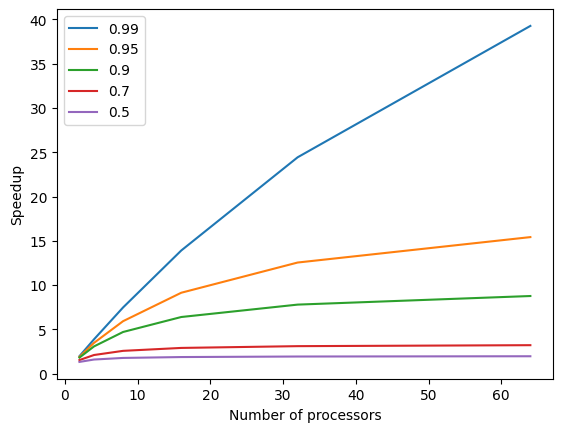

In [28]:
# create plot
for frac in parallelizable_fractions:
    y = [amdahl(nb, frac) for nb in x]
    plt.plot(x,y, label=frac)

plt.xlabel("Number of processors")
plt.ylabel("Speedup")

plt.legend()
plt.show()

In [31]:
# we can see that additional resources provide some utility in evey case observed, but their usefulness is very limited in some cases.
# If the paralleizable fraction is 0.5 for example, going from 1 processor to 64 processors doesn't even provide a 2x speedup (only 1.97 to be precise).
# If the parallelizable portion is 99% however, we get an almost 40x increase when increasing the processor count from 1 to 64

In [34]:
# as the nb of processors approaches infinity, the speedup is only limited by the paralellizable portion of the code.
# If the parallelizable portion is 0.8 for example, we would get a speedup of 5.
# With a portion of .9, we would achieve a speedup of 10, etc.

In [ ]:
# The parallelizable portion can never get of value of 1. A program will necessary have some serial regions